# Applied Data Science

## Projekt Gruppe 6 

Gruppenmitglieder: Reto Alexander Nüesch Erismann, Michelle Daniela Wehrli, Rebecca Sarah Baumann


## Aufgabe 1.1

Datenbezug über API-Schnittstelle von Kaggle, um das Modell zu trainieren, vaidieren und um es zu testen


In [1]:
# !pip install kaggle

In [2]:
# !pip install opendatasets

#### Kommentar: Wir haben manuel den Kaggle API-Token aus dem User-Account ins Working Directory des Jupyter-Notebooks heruntergeladen.

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi ()
api.authenticate ()

import opendatasets as od
od.download("https://www.kaggle.com/datasets/sshikamaru/fruit-recognition")

# od.download("https://www.kaggle.com/datasets/sshikamaru/fruit-recognition", force=True) ... falls die Bilder noch einmal heruntergeladen werden sollten

Skipping, found downloaded files in ".\fruit-recognition" (use force=True to force download)


## Aufgabe 1.2

Bilder zur Überprüfung des Models über Web Scraping beziehen.
Inspirierende Quelle: https://github.com/Emmanuel96/scrape-helmets-images-from-google/blob/main/scrape_helmet_images.py

In [4]:
import os
import json 
import requests
import selenium
from selenium import webdriver 
from selenium.webdriver.chrome.service import Service
import base64
import time
import urllib.request

DRIVER_PATH = r'C:\Users\bauma\OneDrive\Desktop\AppliedDataScience\AppliedDataScience\chromedriver.exe'
SAVE_FOLDER = r'C:\Users\bauma\OneDrive\Desktop\AppliedDataScience\AppliedDataScience\fruit-google'
GOOGLE_IMAGES = 'https://www.google.com/search?q=fruits+single&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjb2_SOjJb3AhWbif0HHbVpCAoQ_AUoAXoECAEQAw&biw=1920&bih=927&dpr=1'

driver = webdriver.Chrome(DRIVER_PATH)
driver.get(GOOGLE_IMAGES)

# Scroll to the end of the page
def scroll_to_end():
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)
    print('scroll done')

counter = 0
for i in range(1,2):     
    scroll_to_end()
    image_elements = driver.find_elements_by_class_name('rg_i')
    print(len(image_elements))
    for image in image_elements: 
        if (image.get_attribute('src') is not None):
            my_image = image.get_attribute('src').split('data:image/jpeg;base64,')
            filename = SAVE_FOLDER + 'fruit'+str(counter)+'.jpeg'
            if(len(my_image) >1): 
                with open(filename, 'wb') as f: 
                    f.write(base64.b64decode(my_image[1]))
            else: 
                print(image.get_attribute('src'))
                urllib.request.urlretrieve(image.get_attribute('src'), SAVE_FOLDER + 'fruit'+ str(counter)+'.jpeg')
            counter += 1

<ipython-input-4-d1da3b011525>:15: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(DRIVER_PATH)


scroll done
100


<ipython-input-4-d1da3b011525>:27: DeprecationWarning: find_elements_by_class_name is deprecated. Please use find_elements(by=By.CLASS_NAME, value=name) instead
  image_elements = driver.find_elements_by_class_name('rg_i')


https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTN4PbdTNEGFn2wN0ow-OjUgyyosN9x-Grh7w&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS_n11axGtCaCKrBWOfpqdX-WySrxoG8y4Pig&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgcwESw87QLkM2CfxaNDEpcl0Os5veQ19Bkw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTQ-9UsDUVEHO6Tx2L_KCEp0toPmdINcOCJRg&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSsQT_ab9WY4D9Lz-bmVyjDhOexPI_Yy-i5MA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIbW2SyS9qdpwyOdntZ6yS-Qi-K1JVbMSDlQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT68b0O5wgNnMvg2hrPVjD4cRADRiFNcmXHvQ&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSbIG7wu1xG8a33mtm_VSjipwpu-Y9QPHeyYw&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSeRLxUF3whkEGEkLCzFGhmr81IAXkdiNAWZA&usqp=CAU
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgFHKfaISUWVLcI8HEnGQJ4mhKMOMfAT6ebw&usqp=CAU


# Aufgabe 2: Datenaufbereitung

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import pandas as pd

import time
import PIL.Image as Image
from IPython.display import Image, display
import matplotlib.cm as cm

In [6]:
data_dir = r'C:\Users\bauma\OneDrive\Desktop\AppliedDataScience\AppliedDataScience\fruit-recognition\train\train' # Das "r" vor dem Pfad ändert die "\" im Pfad zu "/".

BATCH_SIZE = 32
IMG_SIZE = (192, 192)

train_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True,
                                                            seed=999,
                                                            validation_split=0.20,
                                                            subset = "training")

validation_dataset = tf.keras.utils.image_dataset_from_directory(data_dir,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True,
                                                            seed=999,
                                                            validation_split=0.20,
                                                            subset = "validation")

Found 16854 files belonging to 33 classes.
Using 13484 files for training.
Found 16854 files belonging to 33 classes.
Using 3370 files for validation.


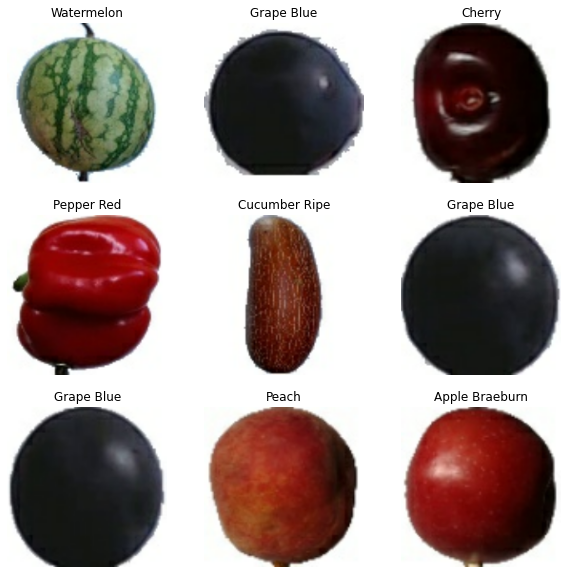

In [7]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
val_dataset = validation_dataset.skip(val_batches // 5)

In [9]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 106
Number of test batches: 21


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [11]:
with tf.device('/cpu:0'):
    data_augmentation = tf.keras.Sequential([
        
        tf.keras.layers.RandomZoom(0.5),                    # Zoom
        tf.keras.layers.RandomFlip("horizontal"),           # Flip
        tf.keras.layers.RandomContrast(0.6),                # Contrast
        tf.keras.layers.RandomRotation(0.2),                # Rotation      
    ])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


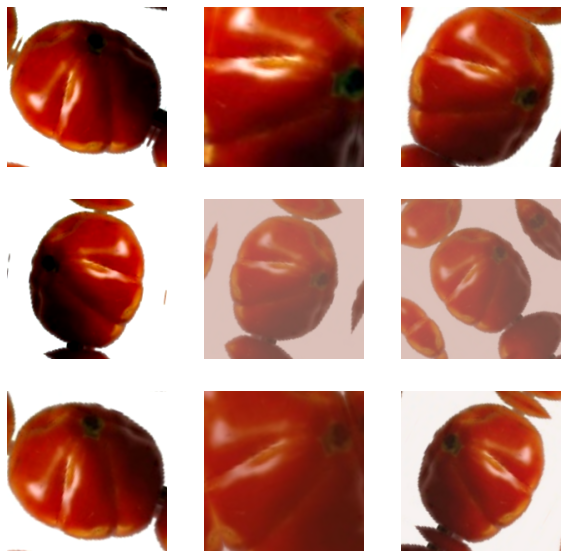

In [12]:
with tf.device('/cpu:0'):
    for image, _ in train_dataset.take(1):
      plt.figure(figsize=(10, 10))
      first_image = image[0]
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [13]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [14]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [15]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 6, 6, 1280)


In [16]:
base_model.trainable = False

In [17]:
base_model.summary()

Model: "mobilenetv2_1.00_192"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 96, 96, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 96, 96, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 96, 96, 32)   0           ['bn_Conv1[0][

In [18]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False) #We need to set `training=False` as our model contains a `BatchNormalization` layer. More explanation here https://www.tensorflow.org/guide/keras/transfer_learning
x = tf.keras.layers.GlobalAveragePooling2D()(x) #this layer has the same purpose as tf.keras.layers.Flatten(). Need to connect something 2D to something 1D. Ask if you want to know more :)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(33, activation="softmax")(x) 
model = tf.keras.Model(inputs, outputs)


In [19]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 192, 192, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 192, 192, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 192, 192, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_192 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                             

In [21]:
initial_epochs = 5

loss0, accuracy0 = model.evaluate(validation_dataset)

C:\Users\bauma\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


106/106 [==============================] - 40s 363ms/step - loss: 3.9244 - accuracy: 0.0092


In [22]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 3.92
initial accuracy: 0.01


In [23]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/5
422/422 [==============================] - 225s 528ms/step - loss: 2.4438 - accuracy: 0.3615 - val_loss: 1.2038 - val_accuracy: 0.8466
Epoch 2/5
422/422 [==============================] - 244s 577ms/step - loss: 1.0301 - accuracy: 0.7726 - val_loss: 0.5751 - val_accuracy: 0.9531
Epoch 3/5
422/422 [==============================] - 217s 515ms/step - loss: 0.6145 - accuracy: 0.8836 - val_loss: 0.3559 - val_accuracy: 0.9712
Epoch 4/5
422/422 [==============================] - 214s 508ms/step - loss: 0.4439 - accuracy: 0.9162 - val_loss: 0.2523 - val_accuracy: 0.9786
Epoch 5/5
422/422 [==============================] - 213s 505ms/step - loss: 0.3480 - accuracy: 0.9357 - val_loss: 0.1942 - val_accuracy: 0.9810


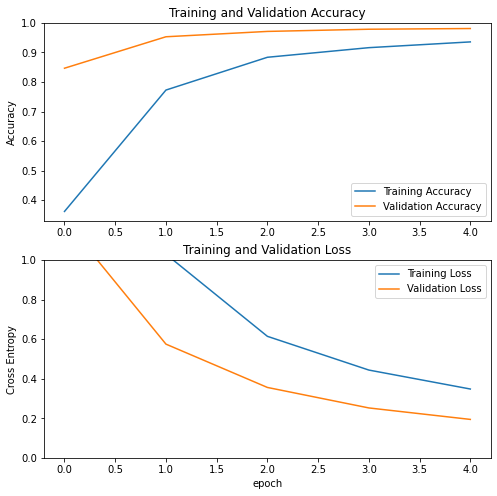

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

 Fine Tuning

In [25]:
base_model.trainable = True

In [26]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [37]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 192, 192, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 192, 192, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 192, 192, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 192, 192, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_192 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                             

In [40]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 5/15
422/422 [==============================] - 302s 708ms/step - loss: 0.1311 - accuracy: 0.9600 - val_loss: 0.0159 - val_accuracy: 0.9994
Epoch 6/15
422/422 [==============================] - 316s 748ms/step - loss: 0.0713 - accuracy: 0.9772 - val_loss: 0.0082 - val_accuracy: 0.9994
Epoch 7/15
422/422 [==============================] - 327s 775ms/step - loss: 0.0545 - accuracy: 0.9841 - val_loss: 0.0103 - val_accuracy: 0.9994
Epoch 8/15
422/422 [==============================] - 342s 812ms/step - loss: 0.0429 - accuracy: 0.9863 - val_loss: 0.0030 - val_accuracy: 0.9997
Epoch 9/15
422/422 [==============================] - 339s 802ms/step - loss: 0.0378 - accuracy: 0.9877 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 10/15
422/422 [==============================] - 329s 780ms/step - loss: 0.0326 - accuracy: 0.9892 - val_loss: 0.0044 - val_accuracy: 0.9985
Epoch 11/15
422/422 [==============================] - 341s 809ms/step - loss: 0.0205 - accuracy: 0.9942 - val_loss: 4.1456

In [41]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

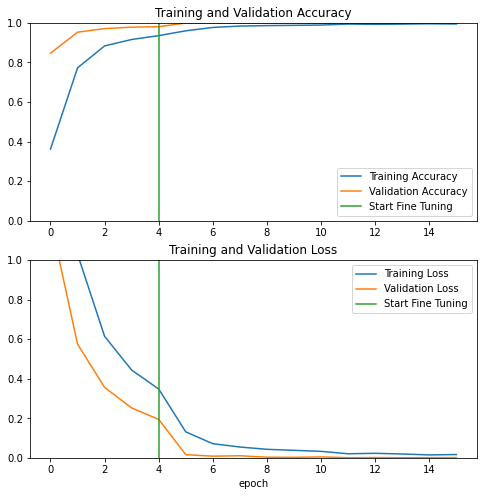

In [42]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Evaluation and Prediction

In [43]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

21/21 [==============================] - 9s 430ms/step - loss: 8.7027e-04 - accuracy: 1.0000
Test accuracy : 1.0


Predictions:
 [0 0 0 ... 0 0 0]
Labels:
 [32 11 26 27 17 11  4 17 14 10 21 29 26 25 23  7  4 18  9  2 19 27 10 12
 20 26 20  7 13 16  2 22]


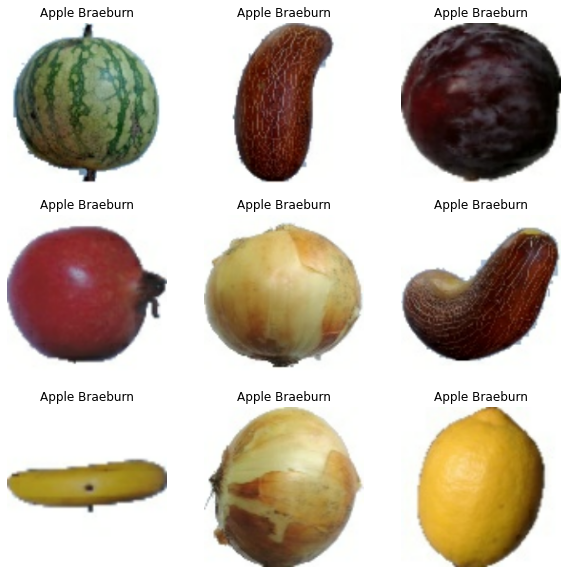

In [44]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")